In [16]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import math
%matplotlib inline
import seaborn as sns
import statsmodels
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

Воспользуемся функциями с лекции.

## Mean monthly air temperature (Deg. F) Nottingham Castle

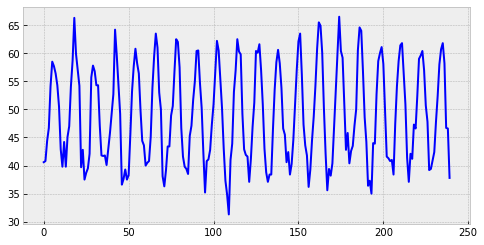

In [5]:
s4 = np.array(mean_monthly_temp['Deg'])
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s4, color='blue')

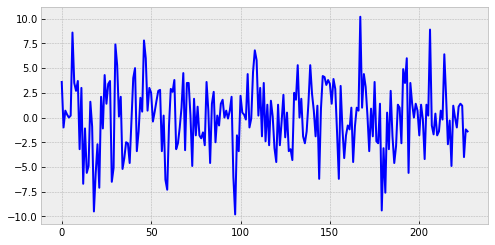

In [21]:
s4_1 = s4[12:] - s4[:-12]
s4_1 = pd.Series(s4_1)
with plt.style.context('bmh'):
        plt.figure(figsize=(8, 4))
        plt.plot(s4_1, color='blue')

In [27]:
def ARIMACrossValidation(data, p, d, q, steps, verbose=False):
    errors = []
    errors_train = []
    for i in range(1, steps+1):
        # Data split
        train, test = data[1:len(data)-i], data[len(data)-i]
        # Model training
        model = statsmodels.tsa.arima.model.ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        #Prediction
        predictions = model_fit.predict(start = len(train), end = len(train))
        predictions_train = model_fit.predict(start = len(train)-1, end = len(train)-1)
        # Metrics evaluation
        errors = np.append(errors, predictions - test)
        errors_train = np.append(errors_train, predictions_train - train[len(train)-1:])
    plt.plot(errors)
    print("Mean absolute error on test vs train of model ARIMA(%d, %d, %d): %f vs %f" % \
          (p, d, q, np.mean(abs(errors)), np.mean(abs(errors_train))))

Mean absolute error on test vs train of model ARIMA(0, 2, 0): 5.192857 vs 5.192857
Mean absolute error on test vs train of model ARIMA(0, 2, 1): 2.993801 vs 3.044428
Mean absolute error on test vs train of model ARIMA(0, 2, 2): 2.096667 vs 2.010338
Mean absolute error on test vs train of model ARIMA(0, 2, 3): 2.013729 vs 1.938146
Mean absolute error on test vs train of model ARIMA(1, 2, 0): 4.051384 vs 4.006107
Mean absolute error on test vs train of model ARIMA(1, 2, 1): 2.504961 vs 2.424781
Mean absolute error on test vs train of model ARIMA(1, 2, 2): 2.004351 vs 1.941617
Mean absolute error on test vs train of model ARIMA(1, 2, 3): 1.928406 vs 1.837950
Mean absolute error on test vs train of model ARIMA(2, 2, 0): 3.097505 vs 2.917959
Mean absolute error on test vs train of model ARIMA(2, 2, 1): 2.354137 vs 2.351161
Mean absolute error on test vs train of model ARIMA(2, 2, 2): 2.403861 vs 2.378477
Mean absolute error on test vs train of model ARIMA(2, 2, 3): 1.902060 vs 1.820829


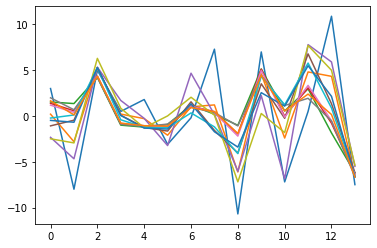

In [36]:
for p in range(3):
    for q in range(4):
        ARIMACrossValidation(s4_1, p, 2, q, 14)

                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                  181
Model:             ARIMA(1, 1, 4)x(0, 1, 4, 12)   Log Likelihood                -417.415
Date:                          Tue, 06 Oct 2020   AIC                            854.829
Time:                                  23:43:38   BIC                            886.069
Sample:                                       0   HQIC                           867.508
                                          - 181                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3682      1.609     -0.229      0.819      -3.522       2.786
ma.L1         -0.3349      1.750     -0.191      0.

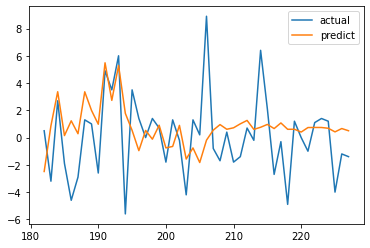

In [48]:
train, test = s4_1[1:len(s4_1)-46], s4_1[len(s4_1)-46:]
model = statsmodels.tsa.arima.model.ARIMA(train, order=(1,1,4), seasonal_order=(0,1,4,12))
model_fit = model.fit()
predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1)

compare_df = pd.concat([s4_1.tail(46), pd.DataFrame(predictions)], axis=1)
compare_df.columns = ['actual','predict']

compare_df.plot()
print(model_fit.summary())